[Задание](https://docs.google.com/document/d/1GTDPHZdyDk7wTXJDRlnUbsuI-7RI0V8r4tOITlZSPLI/edit)

In [5]:
import yfinance as yf
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt

In [2]:
# Указываем тикеры акции и индекса
ticker_1 = ["SPY"]
ticker_2 = ["AAPL"]

# Получаем данные с использованием yfinance
data_1 = yf.download(ticker_1, start="2023-01-03", end="2023-06-30")
data_2 = yf.download(ticker_2, start="2023-01-03", end="2023-06-30")

# Добавляем колонку "ticker" и заполняем
data_1["ticker"] = ticker_1[0]
data_2["ticker"] = ticker_2[0]

# Объединяем данные в один датафрейм
df = pd.concat([data_1, data_2])

# Выводим датафрейм с данными
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2023-01-03,384.369995,386.429993,377.829987,380.820007,377.968140,74850700,SPY
2023-01-04,383.179993,385.880005,380.000000,383.760010,380.886139,85934100,SPY
2023-01-05,381.720001,381.839996,378.760010,379.380005,376.538910,76970500,SPY
2023-01-06,382.609985,389.250000,379.410004,388.079987,385.173737,104189600,SPY
2023-01-09,390.369995,393.700012,387.670013,387.859985,384.955383,73978100,SPY
...,...,...,...,...,...,...,...
2023-06-23,185.550003,187.559998,185.009995,186.679993,186.679993,53079300,AAPL
2023-06-26,186.830002,188.050003,185.229996,185.270004,185.270004,48088700,AAPL
2023-06-27,185.889999,188.389999,185.669998,188.059998,188.059998,50730800,AAPL


In [3]:
# Путь к файлу CSV
csv_file_path = 'data.csv'

# Сохранение DataFrame в формат CSV
df.to_csv(csv_file_path, index=True)

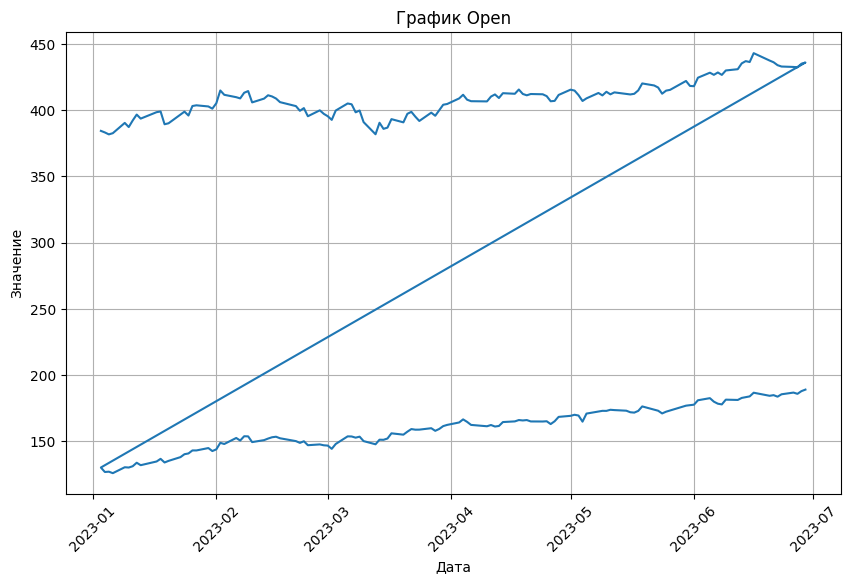

In [9]:
# Выбираем нужную вам колонку для построения графика (например, 'column1')
column_to_plot = 'Open'

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(df.index, df[column_to_plot])
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title(f'График {column_to_plot}')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
psql -h localhost -d postgres -U postgres -c "\copy table_ranks FROM 'D:\Documentation_Python\Pet-projects\data.csv' WITH (FORMAT csv, HEADER true, DELIMITER ',');"

In [21]:
# Настройки подключения к PostgreSQL
host = 'localhost'
database = 'postgres'
user = 'postgres'
password = '1598'
port = '5432'

# Создание SQLAlchemy engine
engine = create_engine(f'postgresql://{user}:{password}@{host}/{database}')

# Создание подключения к PostgreSQL
conn = psycopg2.connect(
    host=host,
    database=database,
    user=user,
    password=password
)

# Имя таблицы, в которую хотим сохранить данные
table_name = 'table_RANKS'

# Сохранение данных DataFrame в таблицу
df.to_sql(table_name, engine, if_exists='replace', index=False)

# Закрываем подключение к PostgreSQL
conn.close()